In [184]:
from littlefish.visulization import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [185]:
simulation_folder = r"F:\little_fish_simulation_logs_8eyes_no_hidden"
min_generation = 0
max_generation = 8

population_size = 1000
turnover_rate = 0.6

mother_fish_num = int(population_size * (1 - turnover_rate))

In [186]:
life_span_df = plotting.collect_life_spans(
    simulation_folder,
    min_generation=min_generation,  # 0
    max_generation=max_generation,  # 25
)

reading generation_0000000, 1 / 9 ...
reading generation_0000001, 2 / 9 ...
reading generation_0000002, 3 / 9 ...
reading generation_0000003, 4 / 9 ...
reading generation_0000004, 5 / 9 ...
reading generation_0000005, 6 / 9 ...
reading generation_0000006, 7 / 9 ...
reading generation_0000007, 8 / 9 ...
reading generation_0000008, 9 / 9 ...


In [187]:
life_span_df.sort_values(by="life_span")

,generation,fish_name,life_span,is_from_last_geneartion
2928,2,fish_241216_16_11_50.605423,59.1,False
7921,7,fish_241216_20_16_58.681121,66.1,False
2938,2,fish_241216_16_11_51.162727,71.1,False
5916,5,fish_241216_18_31_33.200862,71.8,False
5424,5,fish_241216_18_30_54.843224,74.2,False
...,...,...,...,...
8197,8,fish_241216_20_16_20.163003,2105.0,True
8525,8,fish_241216_21_10_28.992754,2123.3,False
8149,8,fish_241216_19_23_33.390574,2155.7,True
7208,7,fish_241216_19_23_20.016744,2256.0,True


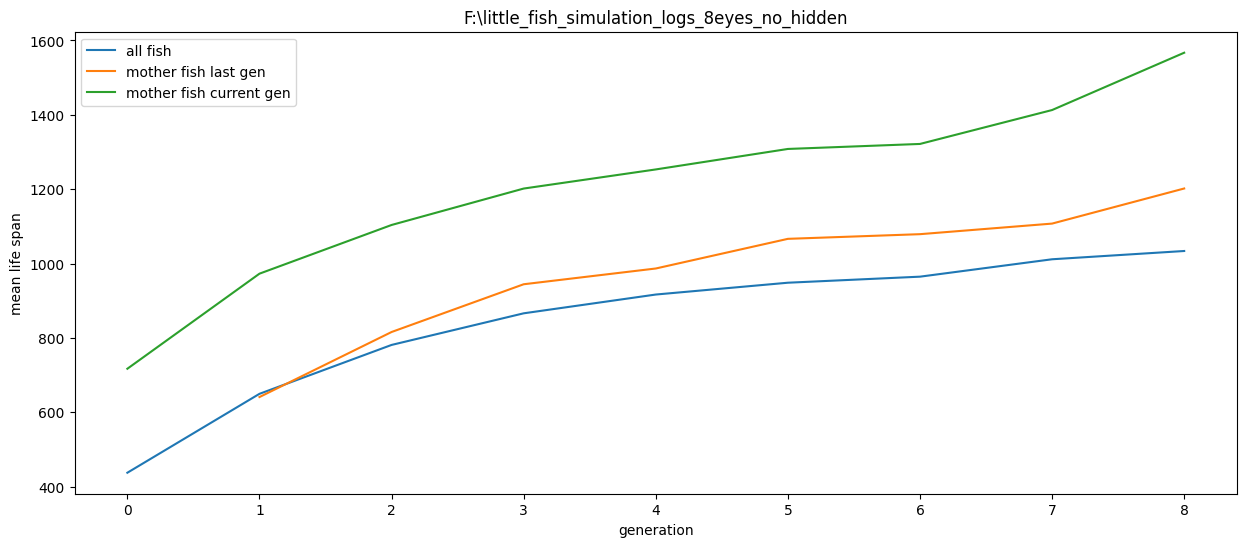

In [188]:
gens = sorted(life_span_df["generation"].unique())
mean_life_span = []
mean_mo_life_last_gen = []
mean_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["life_span"])
    mean_life_span.append(np.mean(curr_life_span))
    mean_mo_life_last_gen.append(np.mean(life_span_df.query("generation == @gen and is_from_last_geneartion")["life_span"]))
    mean_mo_life_curr_gen.append(np.mean(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, mean_life_span, label="all fish")
ax.plot(gens, mean_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, mean_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("mean life span")
ax.set_title(simulation_folder)
ax.legend()

(0.0, 3000.0)

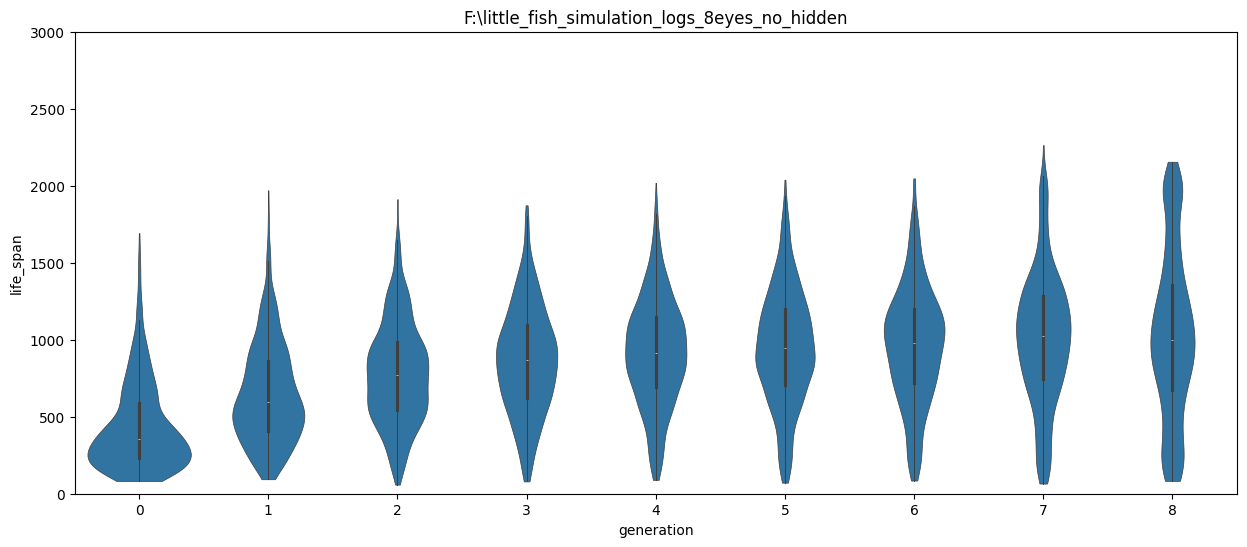

In [189]:
f, ax = plt.subplots(figsize=(15, 6))
ax.set_title(simulation_folder)
sns.violinplot(
    data=life_span_df, x="generation", y="life_span", ax=ax, cut=0, linewidth=0.5,
)
ax.set_ylim([0, 3000])

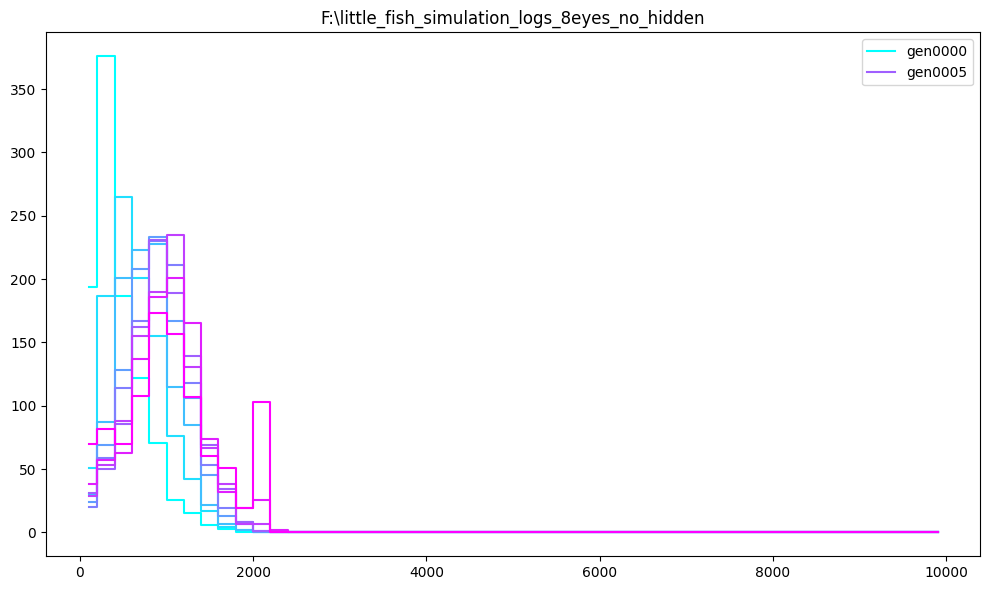

In [190]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title(simulation_folder)
plotting.plot_simulation_life_spans(
    life_span_df, ax, max_life_span=10000, bins=50, legend_gap=5, 
)
ax.legend()
plt.tight_layout()